# Prey-Predator Model

The **prey-predator** model, also known as the Lotka-Volterra model is used to
represent the dynamics of two populations.

- **Preys**: grow with some rate $\alpha$ and die if predators hunt them.
- **Predators**: grow only if they eat preys, otherwise they die.

So to model the system we need

- $\alpha$: preys birth rate.
- $\beta$: the hunt rate that describes the fraction of the meating between
  preys and predators that result in a hunting.
- $\gamma$: the number of offsprings generated by predators after an hunting.
- $\delta$: the death rate of predators.

In the end we obtain the following system of ODEs

$$
\begin{cases}
\dot{V} = \alpha V - \beta V P \\
\dot{P} = \beta \gamma V P - \delta P
\end{cases}
$$


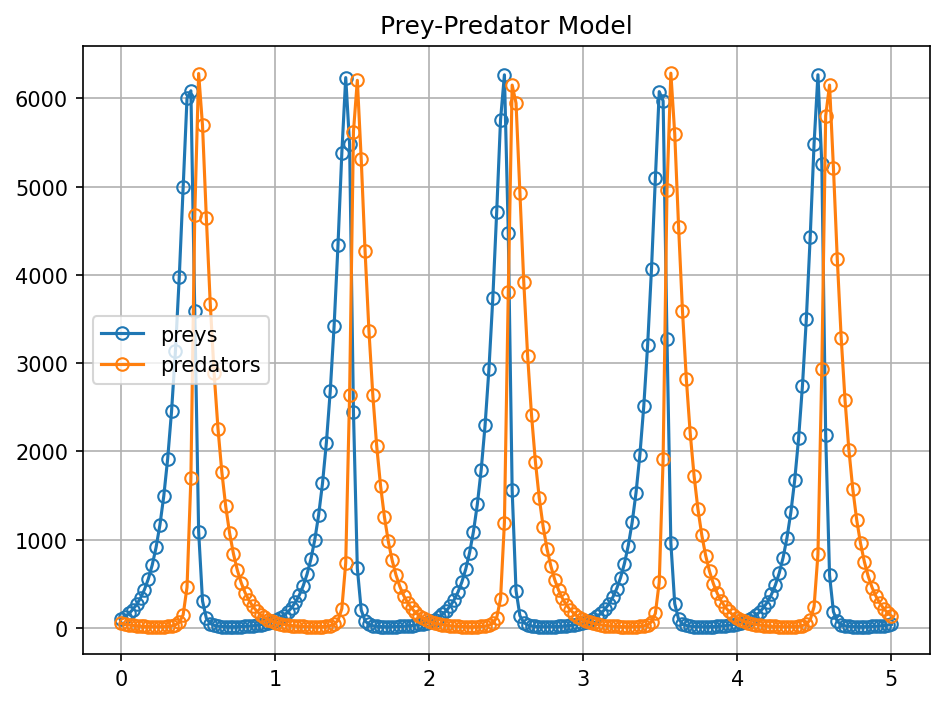

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np


def prey_predator(y, t, alpha, beta, gamma, delta):
    v, p = y
    dvdt = alpha * v - beta * v * p
    dpdt = beta * gamma * v * p - delta * p
    return dvdt, dpdt


alpha = 10 # preys birth rate
beta = 0.01 # hunting rate
gamma = 1 # predators reproduction rate
delta = 10 # predators death rate

y0 = [100, 50]
time = np.linspace(0, 5, 200)
sol = odeint(prey_predator, y0, time, args=(alpha, beta, gamma, delta))

plt.figure(dpi=150)
plt.title("Prey-Predator Model")
plt.plot(time, sol[:, 0], marker="o", mfc="none", label="preys")
plt.plot(time, sol[:, 1], marker="o", mfc="none", label="predators")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## Equilibrium

Lets now compute the equilibrium of the system by setting the derivative to 0.

$$
\begin{cases}
0 = \alpha V - \beta V P \\
0 = \beta \gamma V P - \delta P
\end{cases}
$$

that lead to the following conditions

$$
\begin{cases}
P = \alpha / \beta \\
V = \delta / \beta \gamma
\end{cases}
$$

that for our parameters becomes

$$
\begin{cases}
P = 10 / 0.01 = 1000 \\
V = 10 / 0.01 \cdot 1 = 1000
\end{cases}
$$


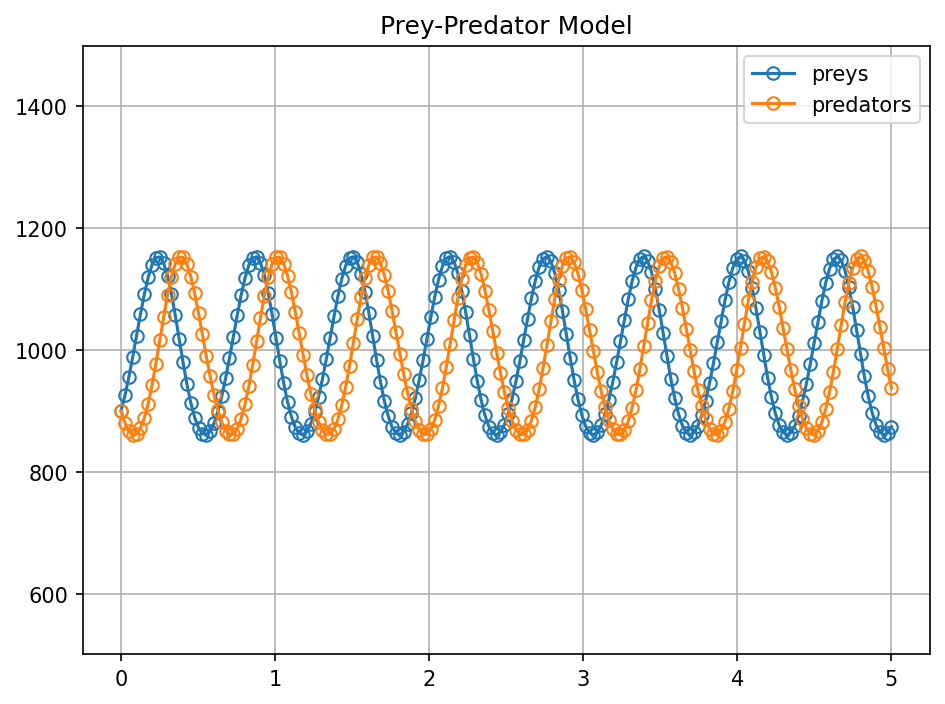

In [7]:
y0 = [900, 900]
time = np.linspace(0, 5, 200)
sol = odeint(prey_predator, y0, time, args=(alpha, beta, gamma, delta))

plt.figure(dpi=150)
plt.title("Prey-Predator Model")
plt.plot(time, sol[:, 0], marker="o", mfc="none", label="preys")
plt.plot(time, sol[:, 1], marker="o", mfc="none", label="predators")
plt.ylim(bottom=500, top=1500)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
